In [2]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.1 MB/s eta 0:00:00


In [3]:
##Libraries required for data preprocessing in this project
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
from sklearn.utils import shuffle
from IPython.display import display
from sklearn.metrics import mutual_info_score
from sklearn.feature_selection import mutual_info_classif
from category_encoders import TargetEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder

In [5]:
##datasets
url="https://raw.githubusercontent.com/Isaac-Jim/ZionTech_Hackathon/refs/heads/main/train.json"
test_url="https://raw.githubusercontent.com/Isaac-Jim/ZionTech_Hackathon/refs/heads/main/test.json"

In [8]:
def wrangle(filepath):
  df=pd.read_json(filepath)
  df.drop_duplicates(inplace=True)
  return df

##calling the function

df=wrangle(url)
df_test=wrangle(test_url)
df.head(4)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,172392,4588175,49,20,single,rented,no,Secretary,Bilaspur,Chhattisgarh,6,11,0
1,246131,6510821,31,15,single,rented,no,Librarian,Amritsar,Punjab,12,10,1
2,51741,9338129,26,7,single,rented,no,Artist,Farrukhabad,Uttar_Pradesh,4,14,0
3,143394,8053436,42,8,single,rented,no,Chef,Mysore[7][8][9],Karnataka,8,11,1


In [9]:
print (f"train dubplicate {df.duplicated().sum()}, test_duplicate {df_test.duplicated().sum()}")

train dubplicate 0, test_duplicate 0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201600 entries, 0 to 201599
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 201600 non-null  int64 
 1   Income             201600 non-null  int64 
 2   Age                201600 non-null  int64 
 3   Experience         201600 non-null  int64 
 4   Married/Single     201600 non-null  object
 5   House_Ownership    201600 non-null  object
 6   Car_Ownership      201600 non-null  object
 7   Profession         201600 non-null  object
 8   CITY               201600 non-null  object
 9   STATE              201600 non-null  object
 10  CURRENT_JOB_YRS    201600 non-null  int64 
 11  CURRENT_HOUSE_YRS  201600 non-null  int64 
 12  Risk_Flag          201600 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 21.5+ MB


In [11]:
print (f"train null{df.isnull().sum()/len(df)*100}\n test dataset null\n {df_test.isnull().sum()/len(df)*100}")

train nullId                   0.0
Income               0.0
Age                  0.0
Experience           0.0
Married/Single       0.0
House_Ownership      0.0
Car_Ownership        0.0
Profession           0.0
CITY                 0.0
STATE                0.0
CURRENT_JOB_YRS      0.0
CURRENT_HOUSE_YRS    0.0
Risk_Flag            0.0
dtype: float64
 test dataset null
 Id                   0.0
Income               0.0
Age                  0.0
Experience           0.0
Married/Single       0.0
House_Ownership      0.0
Car_Ownership        0.0
Profession           0.0
CITY                 0.0
STATE                0.0
CURRENT_JOB_YRS      0.0
CURRENT_HOUSE_YRS    0.0
dtype: float64


In [12]:
### Changing column name formats
df.columns=df.columns.str.lower().str.replace(" ", "_")
df_test.columns=df_test.columns.str.lower().str.replace(" ", "_")
df.columns, df_test.columns

(Index(['id', 'income', 'age', 'experience', 'married/single',
        'house_ownership', 'car_ownership', 'profession', 'city', 'state',
        'current_job_yrs', 'current_house_yrs', 'risk_flag'],
       dtype='object'),
 Index(['id', 'income', 'age', 'experience', 'married/single',
        'house_ownership', 'car_ownership', 'profession', 'city', 'state',
        'current_job_yrs', 'current_house_yrs'],
       dtype='object'))

In [13]:
#### For categorical columns
cols=['married/single',
 'house_ownership',
 'car_ownership',
 'profession',
 'city',
 'state']
df[cols].head(5)

,married/single,house_ownership,car_ownership,profession,city,state
0,single,rented,no,Secretary,Bilaspur,Chhattisgarh
1,single,rented,no,Librarian,Amritsar,Punjab
2,single,rented,no,Artist,Farrukhabad,Uttar_Pradesh
3,single,rented,no,Chef,Mysore[7][8][9],Karnataka
4,single,rented,yes,Technical_writer,Bareilly,Uttar_Pradesh


In [14]:
for column in df[cols]:
    unique_value=np.unique(df[cols][column])
    nr_value=len(unique_value)
    if nr_value<10:
        print('the number of value for  feature {} :{}..{}'.format(column, nr_value,unique_value))
    else:
        print('the number of value for  feature {} :{}'.format(column, nr_value))


the number of value for  feature married/single :2..['married' 'single']
the number of value for  feature house_ownership :3..['norent_noown' 'owned' 'rented']
the number of value for  feature car_ownership :2..['no' 'yes']
the number of value for  feature profession :51
the number of value for  feature city :317
the number of value for  feature state :29


In [15]:
#changing wrong name "norent_noown" to "norent_known"
df['house_ownership'] = df['house_ownership'].replace('norent_noown', 'norent_known')
df_test['house_ownership'] = df_test['house_ownership'].replace('norent_noown', 'norent_known')
df.house_ownership.unique(),df_test.house_ownership.unique()

(array(['rented', 'owned', 'norent_known'], dtype=object),
 array(['rented', 'owned', 'norent_known'], dtype=object))

In [16]:
### City column was mixed with intext citations and the likes so we are trying to remove those traces
df.city=df.city.str.replace(r'\[.*?\]','',regex=True)
df_test.city=df_test.city.str.replace(r'\[.*?\]','',regex=True)
df.city.unique()

array(['Bilaspur', 'Amritsar', 'Farrukhabad', 'Mysore', 'Bareilly',
       'Agartala', 'Erode', 'Uluberia', 'Tenali', 'Aizawl', 'Giridih',
       'Aurangabad', 'Ratlam', 'Kharagpur', 'Visakhapatnam', 'Ballia',
       'Faridabad', 'Thrissur', 'Vijayawada', 'Purnia', 'Kurnool',
       'Malegaon', 'Morbi', 'Nandyal', 'Ambala', 'Saharanpur', 'Dhule',
       'Hapur', 'Dharmavaram', 'Ichalkaranji', 'Salem', 'Bhopal',
       'Chapra', 'Malda', 'Junagadh', 'Mango', 'Nagercoil', 'Jaunpur',
       'Jodhpur', 'Aligarh', 'Guntur', 'Ahmednagar', 'Maheshtala',
       'Nashik', 'Ramagundam', 'Mangalore', 'Bangalore', 'Jalna',
       'Allahabad', 'Rajkot', 'Ambarnath', 'Thiruvananthapuram',
       'Bhagalpur', 'Siliguri', 'Bahraich', 'Gulbarga', 'Howrah',
       'Jalgaon', 'Eluru', 'Bharatpur', 'Kakinada', 'Sambhal', 'Unnao',
       'Bhalswa_Jahangir_Pur', 'Pune', 'Raurkela_Industrial_Township',
       'Panipat', 'Kavali', 'Jorhat', 'Kolkata', 'Bijapur', 'Fatehpur',
       'Nangloi_Jat', 'Hosur', 'Nan

In [17]:
### City column was mixed with intext citations and the likes so we are trying to remove those traces
df.state=df.state.str.replace(r'\[.*?\]','',regex=True)
df_test.state=df_test.state.str.replace(r'\[.*?\]','',regex=True)

In [18]:

### Changing categories to lower ans adding _ to spaces for bettter use
categorical_columns=list(df.dtypes[df.dtypes=="object"].index)
for c in categorical_columns:
  df[c]=df[c].str.lower().str.replace(" ", "_")

categorical_columns=list(df_test.dtypes[df_test.dtypes=="object"].index)
for c in categorical_columns:
  df_test[c]=df_test[c].str.lower().str.replace(" ", "_")

In [19]:
df.set_index("id", inplace=True)
df_test.set_index("id", inplace=True)

In [20]:
df[categorical_columns].nunique()

,0
married/single,2
house_ownership,3
car_ownership,2
profession,51
city,316
state,28


In [21]:
 df['profession'].unique()

array(['secretary', 'librarian', 'artist', 'chef', 'technical_writer',
       'firefighter', 'mechanical_engineer', 'surveyor', 'physician',
       'chemical_engineer', 'microbiologist', 'industrial_engineer',
       'geologist', 'designer', 'civil_servant', 'fashion_designer',
       'comedian', 'army_officer', 'police_officer',
       'chartered_accountant', 'hotel_manager', 'graphic_designer',
       'official', 'engineer', 'software_developer', 'analyst',
       'architect', 'lawyer', 'magistrate', 'surgeon', 'civil_engineer',
       'statistician', 'psychologist', 'flight_attendant', 'drafter',
       'politician', 'web_designer', 'consultant', 'financial_analyst',
       'computer_operator', 'petroleum_engineer', 'scientist',
       'technician', 'air_traffic_controller', 'aviator',
       'design_engineer', 'computer_hardware_engineer', 'economist',
       'technology_specialist', 'dentist', 'biomedical_engineer'],
      dtype=object)

In [22]:
#### Grouping everything on professional columns since it has high dimension
conditions = [
    df['profession'].isin(['physician', 'surgeon', 'dentist', 'psychologist', 'biomedical_engineer']),
    df['profession'].isin(['mechanical_engineer', 'chemical_engineer', 'industrial_engineer', 'civil_engineer', 'design_engineer', 'computer_hardware_engineer', 'petroleum_engineer']),
    df['profession'].isin(['software_developer', 'web_designer', 'computer_operator', 'technology_specialist']),
    df['profession'].isin(['artist', 'designer', 'fashion_designer', 'graphic_designer']),
    df['profession'].isin(['chef', 'firefighter', 'hotel_manager', 'flight_attendant']),
    df['profession'].isin(['secretary', 'librarian', 'technical_writer', 'official', 'statistician', 'drafter', 'computer_operator']),
    df['profession'].isin(['lawyer', 'magistrate', 'chartered_accountant', 'financial_analyst']),
    df['profession'].isin(['police_officer', 'army_officer', 'air_traffic_controller'])
]

choices = [
    'healthcare', 'engineering', 'technology', 'arts/design', 'services', 'office/admin', 'legal', 'public_safety'
]

df['profession_grouped'] = np.select(conditions, choices, default='Other')

conditions_test = [
    df_test['profession'].isin(['physician', 'surgeon', 'dentist', 'psychologist', 'biomedical_engineer']),
    df_test['profession'].isin(['mechanical_engineer', 'chemical_engineer', 'industrial_engineer', 'civil_engineer', 'design_engineer', 'computer_hardware_engineer', 'petroleum_engineer']),
    df_test['profession'].isin(['software_developer', 'web_designer', 'computer_operator', 'technology_specialist']),
    df_test['profession'].isin(['artist', 'designer', 'fashion_designer', 'graphic_designer']),
    df_test['profession'].isin(['chef', 'firefighter', 'hotel_manager', 'flight_attendant']),
    df_test['profession'].isin(['secretary', 'librarian', 'technical_writer', 'official', 'statistician', 'drafter', 'computer_operator']),
    df_test['profession'].isin(['lawyer', 'magistrate', 'chartered_accountant', 'financial_analyst']),
    df_test['profession'].isin(['police_officer', 'army_officer', 'air_traffic_controller'])
]

df_test['profession_grouped'] = np.select(conditions_test, choices, default='Other')

In [23]:
df['profession_grouped'].value_counts()

,count
profession_grouped,
Other,52899
engineering,28426
office/admin,24134
healthcare,20846
technology,16159
arts/design,15849
legal,15754
services,15582
public_safety,11951


In [24]:
# !pip install category_encoders

In [25]:
X_train_full = df.drop('risk_flag', axis=1)
y_train_full= df['risk_flag']

In [26]:
X_train_full.head(5)

,income,age,experience,married/single,house_ownership,car_ownership,profession,city,state,current_job_yrs,current_house_yrs,profession_grouped
id,,,,,,,,,,,,
172392,4588175,49,20,single,rented,no,secretary,bilaspur,chhattisgarh,6,11,office/admin
246131,6510821,31,15,single,rented,no,librarian,amritsar,punjab,12,10,office/admin
51741,9338129,26,7,single,rented,no,artist,farrukhabad,uttar_pradesh,4,14,arts/design
143394,8053436,42,8,single,rented,no,chef,mysore,karnataka,8,11,services
146824,3589662,42,18,single,rented,yes,technical_writer,bareilly,uttar_pradesh,13,13,office/admin


In [27]:
X_test=df_test.copy()

In [28]:
# Initialize columns
X_train_full['city_encoded'] = np.nan
X_train_full['state_encoded'] = np.nan

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_idx, val_idx in kf.split(X_train_full, y_train_full):
    X_tr, X_val = X_train_full.iloc[train_idx], X_train_full.iloc[val_idx]
    y_tr = y_train_full.iloc[train_idx]

    # City encoding
    city_encoder = TargetEncoder(smoothing=10)
    city_encoder.fit(X_tr['city'], y_tr)
    X_train_full.loc[X_train_full.index[val_idx], 'city_encoded'] = \
        city_encoder.transform(X_val['city']).values.ravel()

    # State encoding
    state_encoder = TargetEncoder(smoothing=10)
    state_encoder.fit(X_tr['state'], y_tr)
    X_train_full.loc[X_train_full.index[val_idx], 'state_encoded'] = \
        state_encoder.transform(X_val['state']).values.ravel()

# Fit final encoders on full data to use on test set
final_city_encoder = TargetEncoder(smoothing=10).fit(X_train_full['city'], y_train_full)
final_state_encoder = TargetEncoder(smoothing=10).fit(X_train_full['state'], y_train_full)

X_test['city_encoded'] = final_city_encoder.transform(X_test['city']).values.ravel()
X_test['state_encoded'] = final_state_encoder.transform(X_test['state']).values.ravel()

# Drop original text columns
X_train_full.drop(['city', 'state'], axis=1, inplace=True)
X_test.drop(['city', 'state'], axis=1, inplace=True)


In [29]:
X_train_full.head(5)

,income,age,experience,married/single,house_ownership,car_ownership,profession,current_job_yrs,current_house_yrs,profession_grouped,city_encoded,state_encoded
id,,,,,,,,,,,,
172392,4588175,49,20,single,rented,no,secretary,6,11,office/admin,0.127983,0.132305
246131,6510821,31,15,single,rented,no,librarian,12,10,office/admin,0.055556,0.084128
51741,9338129,26,7,single,rented,no,artist,4,14,arts/design,0.071082,0.118649
143394,8053436,42,8,single,rented,no,chef,8,11,services,0.229614,0.101594
146824,3589662,42,18,single,rented,yes,technical_writer,13,13,office/admin,0.041667,0.118649


In [30]:
X_train_full["city_encoded"].values

array([0.12798265, 0.05555556, 0.07108239, ..., 0.14508929, 0.0557554 ,
       0.12704174])

In [31]:
X_train_full_copy=X_train_full.copy()

In [32]:
X_train_full_copy.drop(columns="profession", inplace=True)

In [33]:
### Perfoming label encoding on categorical columns
cat_cols=['married/single', 'house_ownership',
       'car_ownership','profession_grouped']
X_train_full_copy[cat_cols].head(5)

,married/single,house_ownership,car_ownership,profession_grouped
id,,,,
172392,single,rented,no,office/admin
246131,single,rented,no,office/admin
51741,single,rented,no,arts/design
143394,single,rented,no,services
146824,single,rented,yes,office/admin


In [34]:
X_train_full_copy[cat_cols].value_counts()

married/single  house_ownership  car_ownership  profession_grouped
single          rented           no             Other                 30403
                                                engineering           16004
                                                office/admin          14219
                                 yes            Other                 13128
                                 no             healthcare            12462
                                                                      ...  
married         norent_known     no             technology                3
                                                public_safety             2
                owned            yes            public_safety             2
                norent_known     yes            technology                2
                                                arts/design               1
Name: count, Length: 107, dtype: int64

In [35]:
low_card_cols = ['married/single', 'house_ownership', 'car_ownership', 'profession_grouped']

for col in low_card_cols:
    le = LabelEncoder()
    X_train_full_copy[col] = le.fit_transform(X_train_full_copy[col])
    X_test[col] = le.transform(X_test[col])

In [36]:
X_train_full_copy.head(5)

,income,age,experience,married/single,house_ownership,car_ownership,current_job_yrs,current_house_yrs,profession_grouped,city_encoded,state_encoded
id,,,,,,,,,,,
172392,4588175,49,20,1,2,0,6,11,5,0.127983,0.132305
246131,6510821,31,15,1,2,0,12,10,5,0.055556,0.084128
51741,9338129,26,7,1,2,0,4,14,1,0.071082,0.118649
143394,8053436,42,8,1,2,0,8,11,7,0.229614,0.101594
146824,3589662,42,18,1,2,1,13,13,5,0.041667,0.118649


In [37]:
mutual_cols=["married/single","house_ownership","car_ownership","profession_grouped"\

             ]
X_categorical=X_train_full_copy[["married/single","house_ownership","car_ownership","profession_grouped",\
                                 "city_encoded","state_encoded"

             ]]

In [38]:
discrete_features = [True] * X_categorical.shape[1]

categorical_mi = pd.Series(mutual_info_classif(X_categorical, y_train_full, discrete_features=discrete_features), index=X_categorical.columns)
categorical_mi = categorical_mi.sort_values(ascending=False)

print("Mutual Information (Categorical Only):\n", categorical_mi)

Mutual Information (Categorical Only):
 city_encoded          0.013616
state_encoded         0.001667
profession_grouped    0.000412
house_ownership       0.000373
car_ownership         0.000271
married/single        0.000214
dtype: float64


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/cluster/_supervised.py:59: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/cluster/_supervised.py:59: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)


In [39]:
X_numerical = X_train_full_copy[['income', 'age', 'experience', 'current_job_yrs', 'current_house_yrs']]
y = y_train_full
numerical_corr = X_numerical.corrwith(y).sort_values(ascending=False)

print("Correlation with Risk_Flag:\n", numerical_corr)

Correlation with Risk_Flag:
 current_house_yrs   -0.003396
income              -0.003554
current_job_yrs     -0.016407
age                 -0.022485
experience          -0.034833
dtype: float64


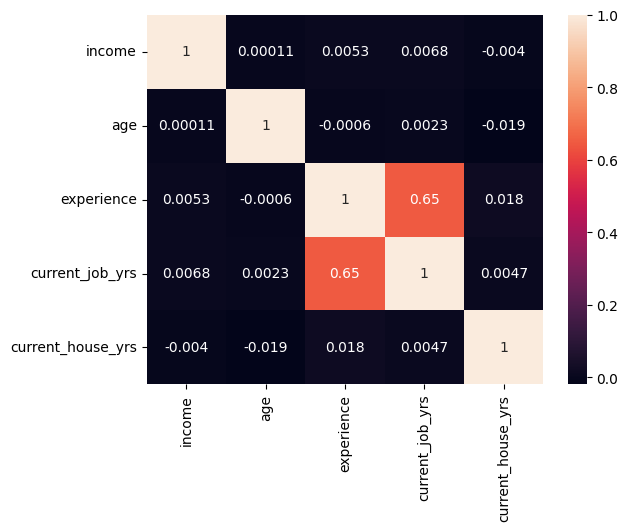

In [40]:
correlation=X_train_full_copy[['income', 'age', 'experience', 'current_job_yrs', 'current_house_yrs']].corr()

sns.heatmap(correlation, annot=True);

In [41]:
### For testing dataset
X_test.head(5)

,income,age,experience,married/single,house_ownership,car_ownership,profession,current_job_yrs,current_house_yrs,profession_grouped,city_encoded,state_encoded
id,,,,,,,,,,,,
76028,2687545,60,3,1,2,1,technical_writer,3,11,5,0.197500,0.129734
226614,9559493,77,3,1,2,0,army_officer,3,13,6,0.112813,0.122163
65661,5203215,51,19,1,2,0,civil_servant,8,13,0,0.127396,0.129566
7056,7235618,78,16,1,1,0,artist,14,11,1,0.145283,0.117569
231613,4408094,30,8,1,2,1,petroleum_engineer,4,10,2,0.091295,0.129566


In [42]:
X_test.drop(columns="profession", inplace=True)

In [43]:
X_test.head(4)

,income,age,experience,married/single,house_ownership,car_ownership,current_job_yrs,current_house_yrs,profession_grouped,city_encoded,state_encoded
id,,,,,,,,,,,
76028,2687545,60,3,1,2,1,3,11,5,0.197500,0.129734
226614,9559493,77,3,1,2,0,3,13,6,0.112813,0.122163
65661,5203215,51,19,1,2,0,8,13,0,0.127396,0.129566
7056,7235618,78,16,1,1,0,14,11,1,0.145283,0.117569


In [45]:
X_train_full_copy.head()

,income,age,experience,married/single,house_ownership,car_ownership,current_job_yrs,current_house_yrs,profession_grouped,city_encoded,state_encoded
id,,,,,,,,,,,
172392,4588175,49,20,1,2,0,6,11,5,0.127983,0.132305
246131,6510821,31,15,1,2,0,12,10,5,0.055556,0.084128
51741,9338129,26,7,1,2,0,4,14,1,0.071082,0.118649
143394,8053436,42,8,1,2,0,8,11,7,0.229614,0.101594
146824,3589662,42,18,1,2,1,13,13,5,0.041667,0.118649


In [48]:
train_data=pd.concat([X_train_full_copy, y_train_full], axis=1)

In [49]:
train_data.head()

,income,age,experience,married/single,house_ownership,car_ownership,current_job_yrs,current_house_yrs,profession_grouped,city_encoded,state_encoded,risk_flag
id,,,,,,,,,,,,
172392,4588175,49,20,1,2,0,6,11,5,0.127983,0.132305,0
246131,6510821,31,15,1,2,0,12,10,5,0.055556,0.084128,1
51741,9338129,26,7,1,2,0,4,14,1,0.071082,0.118649,0
143394,8053436,42,8,1,2,0,8,11,7,0.229614,0.101594,1
146824,3589662,42,18,1,2,1,13,13,5,0.041667,0.118649,0


In [52]:
## Saving preprocessed data
train_data.to_csv("train_data_preprocessed.csv", index=False)
X_test.to_csv("Test_data_preprocessed.csv", index=False)